# Census Pulse Survey

### What is the Household Pulse Survey?

The U.S. Census Bureau, in collaboration with five federal agencies, is in a unique position to produce
data on the social and economic effects of COVID-19 on American households. The Household Pulse
Survey (HPS) is designed to deploy quickly and efficiently, collecting data on a range of ways in which
people’s lives have been impacted by the pandemic. Data will be disseminated in near real-time to
inform federal and state response and recovery planning.

The Household Pulse Survey will ask individuals about their experiences in terms of employment status,
spending patterns, food security, housing, physical and mental health, access to health care, and
educational disruption. The questionnaire is a result of collaboration between the U.S. Census Bureau
and the USDA Economic Research Service (ERS), the Bureau of Labor Statistics (BLS), the National Center
for Health Statistics (NCHS), the National Center for Education Statistics (NCES), and the Department of
Housing and Urban Development (HUD).

The data collected will enable the Census Bureau and these partner agencies to produce statistics at a
state level and for the 15 largest Metropolitan Statistical Areas (MSAs). The survey also is designed to
be longitudinal: data will provide insights with regard to how household experiences changed during
the pandemic.

The Census Bureau and its federal statistical partners are considered the preeminent source of the
nation's most important benchmark surveys. Many of these surveys have been ongoing for more than
80 years and provide valuable insight on social and economic trends. The production of these
benchmark surveys is by nature a highly deliberative process. While efforts are underway to introduce
COVID-19 questions into these surveys, that process can take months, sometimes years, before data are
made available.

The approach for the Household Pulse Survey is different: It is designed to be a short-turnaround
instrument that will provide valuable data to aid in the post-pandemic recovery. The Census Bureau is
fielding the Household Pulse Survey as a demonstration project that is part of the Experimental Data
Product series. 

#### Data Acquisition & Processing
Data collection began on April 23, 2020, conducted by an internet questionnaire, with links sent by
email. Outbound email to a single email address per household were sent to 1,867,126 email addresses.
In week two, the capacity to email up to five email addresses per household was added. With email now
fully available as a contact method we continued the initial sample for an extra week. The combined
response from week one and the added second week for the week one sample generated 74,413
complete and sufficient partial interviews, approximately a 3.8% weighted response rate. This was less
than the 93,500 expected interviews and 5% response rate, but represents contacts only through email.

On May 7, 2020, the second weekly sample was released combing households with completed
interviews from the initial sample with new households for a total of 1,048,950 households. This second
sample, also marked the addition of the capacity to invite survey responses through text messaging. The
cases now include up to five email addresses, and up to five cellular telephone numbers. Initial contact
plans for the second sample specified contacting the previously interviewed households by whichever
means they identified as their preferred method and contact. Between May 7 and May 12, 2020 another
41,996 interviews were collected, an approximately 1.3% weighted response rate.

Data were released May 20, 2020, marking a very rapid 6-weeks since the first discussion of an
interagency rapid response survey to measure the COVID-19 pandemic’s impact on American
households. Data expected to be released through tables, interactive data tools, and microdata
accessible from the U.S. Census Bureau’s Experimental Data webpage. 

 The phone frame contains over a billion phone/address
pairs, and the email frame contains over 686 million well-formed email/address pairs. The phone frame
contains phone/address pairs for over 88 percent of addresses in the country, and over three quarters
of those phone numbers were acquired in the past two years. The email frame contains email/address
links for almost 80 percent of addresses in the country, and two-thirds of those emails were acquired in
past two years. Unique phone numbers and email addresses were identified and assigned to only one
housing unit (HU). The HUs on MAF were then limited to these addresses on the Contact Frame as the
final eligible HUs for the HPS. 

The weighting procedure will be applied within each state and consist of four adjustments that will be
applied to the base weights to account for nonresponse and coverage of the demographics of the
interviewed persons. These adjustments are: 1) the household nonresponse adjustment to account for
households that do not respond to the survey; 2) an adjustment to control the weights to the occupied
housing unit counts using the ACS occupied housing unit estimates based on the 2014-2018 5-year
estimates; 3) an adjustment to account for the number of adults within the housing unit; and 4) a twostep iterative raking procedure

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [85]:
# Data files
unexpected_loss_path = "KS-NJ_loss_in_employment_income.csv"
expected_loss_path = "KS-NJexpected_loss_of_income.csv"
delayed_care_path = "KS-NJ Delayed Medical Care.csv"
housing_insecurity_path = "KS-NJ food insecurity.csv"
food_scarcity_path = "KS-NJ Food Scarcity.csv"
school_changes_path = "KS-NJ K-12 changes.csv"

# Read the mouse data and the study results
unexpected_loss_df = pd.read_csv(unexpected_loss_path).sort_values("Week", ascending=True)
expected_loss_df =  pd.read_csv(expected_loss_path).sort_values("Week", ascending=True)
delayed_care_df =  pd.read_csv(delayed_care_path).sort_values("Week", ascending=True)
housing_insecurity_df =  pd.read_csv(housing_insecurity_path).sort_values("Week", ascending=True)
food_scarcity_df =  pd.read_csv(food_scarcity_path).sort_values("Week", ascending=True)
school_changes_df =  pd.read_csv(school_changes_path).sort_values("Week", ascending=True)

# Combine the data into a single dataset
#combined_df = pd.merge(unexpected_loss_df, expected_loss_df, delayed_care_df, housing_insecurity_df, food_scarcity_df, school_changes_df, on="Area", how="left")


## Employment

The employment section asks direct questions about the household and respondent experience of employment loss. Questions then focus on the respondent experience of work, and for those who did
not work in the last seven days, what the reasons for not working. These reasons include choices that
specifically refer to various impacts associated with the COVID-19 pandemic. Respondents can identify
their own illness with coronavirus symptoms, caring for ill family members, accommodating the caretaking caused by closed services, and employment loss due to furlough or shuttering of employment
due to the coronavirus pandemic.

### Unexpected Loss of Employment

In [86]:
unexpected_loss_df.drop(unexpected_loss_df.loc[unexpected_loss_df["Area"]== "United States"].index, inplace=True)
nj_unexpected_loss_df = unexpected_loss_df.loc[unexpected_loss_df["Area"] == "New Jersey"]
ks_unexpected_loss_df = unexpected_loss_df.loc[unexpected_loss_df["Area"] == "Kansas"]


In [87]:
nj_unexpected_loss_df

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
35,1,New Jersey,6776822,3638322,228201,53.9,3.4
32,2,New Jersey,6776822,3831063,328656,56.6,4.9
29,3,New Jersey,6776822,3668472,264422,54.6,3.9
26,4,New Jersey,6776822,3608781,207488,53.5,3.1
23,5,New Jersey,6776822,3589084,183832,53.5,2.6
20,6,New Jersey,6776822,3461303,327851,51.5,4.9
17,7,New Jersey,6776822,3273463,276737,48.5,4.1
14,8,New Jersey,6776822,3632907,219031,54.2,3.3
11,9,New Jersey,6776822,3550754,236432,53.0,3.5
8,10,New Jersey,6776822,3544761,259130,53.0,3.8


In [88]:
ks_unexpected_loss_df

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
34,1,Kansas,2140957,750885,75707,35.2,3.5
31,2,Kansas,2140957,751894,117905,35.2,5.5
28,3,Kansas,2140957,866413,87431,40.5,4.1
25,4,Kansas,2140957,865204,84610,40.5,3.9
22,5,Kansas,2140957,918833,71850,43.1,3.4
19,6,Kansas,2140957,828284,84015,39.0,4.0
16,7,Kansas,2140957,921443,98447,43.1,4.6
13,8,Kansas,2140957,847365,72351,39.9,3.4
10,9,Kansas,2140957,906614,66971,42.4,3.1
7,10,Kansas,2140957,867355,76604,40.7,3.6


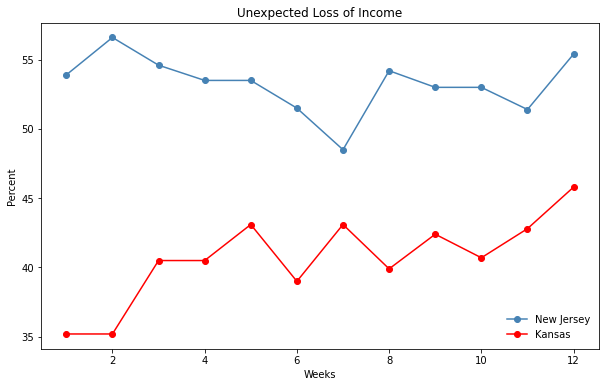

In [89]:
nj_unexpected = nj_unexpected_loss_df["Percent"]
ks_unexpected = ks_unexpected_loss_df["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_unexpected_plot, = plt.plot(Week, nj_unexpected, marker = "o", color = "steelblue", label = "New Jersey")
ks_unexpected_plot, = plt.plot(Week, ks_unexpected, marker = "o", color = "red", label = "Kansas")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Unexpected Loss of Income")

plt.legend(loc='best', frameon=False)
plt.savefig("Unexpected Loss of Income.png")
plt.show()

### Expected Loss of employment
###### Percentage of adults who expect someone in their household to have a loss in employment income in the next 4 weeks.

In [90]:
expected_loss_df.drop(expected_loss_df.loc[expected_loss_df["Area"]== "United States"].index, inplace=True)
nj_expected_loss_df = expected_loss_df.loc[expected_loss_df["Area"] == "New Jersey"]
ks_expected_loss_df = expected_loss_df.loc[expected_loss_df["Area"] == "Kansas"]

In [91]:
nj_expected_loss_df

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
35,1,New Jersey,6776822,3159325,254553,47.0,3.8
32,2,New Jersey,6776822,3292129,332487,48.6,4.9
29,3,New Jersey,6776822,2968641,281697,44.2,4.1
26,4,New Jersey,6776822,2796973,191882,41.5,2.9
23,5,New Jersey,6776822,2760082,203590,41.2,2.9
20,6,New Jersey,6776822,2363227,272321,35.4,4.0
17,7,New Jersey,6776822,2350398,250459,34.8,3.7
14,8,New Jersey,6776822,2404377,210969,35.9,3.1
11,9,New Jersey,6776822,2782270,227685,41.4,3.4
8,10,New Jersey,6776822,2221539,171778,32.9,2.5


In [92]:
ks_expected_loss_df

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
34,1,Kansas,2140957,613553,80251,28.9,3.8
31,2,Kansas,2140957,534482,121982,25.1,5.7
28,3,Kansas,2140957,627879,71040,29.6,3.4
25,4,Kansas,2140957,568285,69926,26.7,3.3
22,5,Kansas,2140957,579555,74364,27.2,3.5
19,6,Kansas,2140957,511683,62491,24.0,2.9
16,7,Kansas,2140957,475563,70956,22.3,3.3
13,8,Kansas,2140957,457722,78896,21.5,3.7
10,9,Kansas,2140957,606548,85600,28.5,4.0
7,10,Kansas,2140957,604740,76085,28.4,3.6


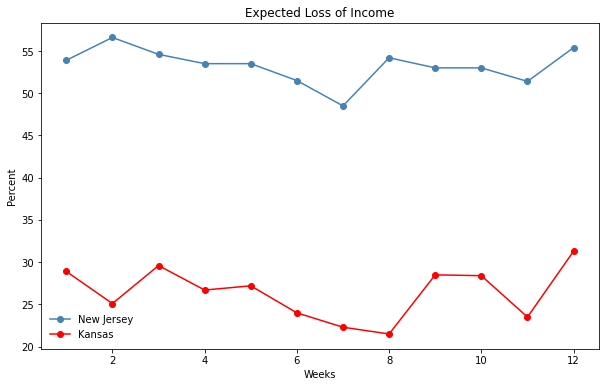

In [93]:
nj_expected = nj_expected_loss_df["Percent"]
ks_unexpected = ks_expected_loss_df["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_expected_plot, = plt.plot(Week, nj_unexpected, marker = "o", color = "steelblue", label = "New Jersey")
ks_expected_plot, = plt.plot(Week, ks_unexpected, marker = "o", color = "red", label = "Kansas")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Expected Loss of Income")

plt.legend(loc='best', frameon=False)
plt.savefig("Expected Loss of Income.png")
plt.show()

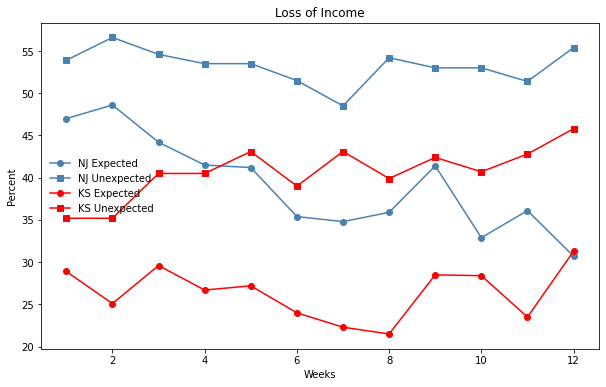

In [94]:
nj_expected = nj_expected_loss_df["Percent"]
ks_expected = ks_expected_loss_df["Percent"]
nj_unexpected = nj_unexpected_loss_df["Percent"]
ks_unexpected = ks_unexpected_loss_df["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_expected_plot, = plt.plot(Week, nj_expected, marker = "o", color = "steelblue", label = "NJ Expected")
nj_unexpected_plot, = plt.plot(Week, nj_unexpected, marker = "s", color = "steelblue", label = "NJ Unexpected")
ks_expected_plot, = plt.plot(Week, ks_expected, marker = "o", color = "red", label = "KS Expected")
ks_unexpected_plot, = plt.plot(Week, ks_unexpected, marker = "s", color = "red", label = "KS Unexpected")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Loss of Income")

plt.legend(loc='best', frameon=False)
plt.savefig("Expected vs. Unexpected Loss of Income.png")
plt.show()

### Delayed Medical Care

The National Center for Health Statistics collaborated with the Census Bureau to incorporate mental
health and health access measures. The section begins with the well tested general health status used
on many surveys, followed by four questions that focus on mental health. Borrowed from the NHIS, the
first two address anxiety, and the second two are focused on depression. In addition to the questions that measure aspects of mental health and general health status, the HPS
includes the health insurance item used on the American Community Survey, and then follow-up with
two questions that address delayed and forgone medical care as a result of the COVID-19 pandemic.


In [95]:
delayed_care_df.drop(delayed_care_df.loc[delayed_care_df["Area"]== "United States"].index, inplace=True)
nj_delayed_care_df = delayed_care_df.loc[delayed_care_df["Area"] == "New Jersey"]
ks_delayed_care_df = delayed_care_df.loc[delayed_care_df["Area"] == "Kansas"]

In [96]:
nj_delayed_care_df 

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
35,1,New Jersey,6776822,2251839,223489,37.9,3.7
32,2,New Jersey,6776822,2606712,272889,43.7,4.5
29,3,New Jersey,6776822,2898537,284389,47.0,4.6
26,4,New Jersey,6776822,2404014,227847,41.1,3.8
23,5,New Jersey,6776822,2636299,208465,45.0,3.2
20,6,New Jersey,6776822,2795091,270565,47.7,4.3
17,7,New Jersey,6776822,2731683,263354,44.8,4.3
14,8,New Jersey,6776822,2828123,240526,45.7,4.0
11,9,New Jersey,6776822,2898435,268958,47.3,4.1
8,10,New Jersey,6776822,2785726,255154,45.6,4.0


In [97]:
ks_delayed_care_df

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
34,1,Kansas,2140957,693203,82792,35.3,4.1
31,2,Kansas,2140957,772358,114715,38.2,5.4
28,3,Kansas,2140957,721574,104560,36.6,5.1
25,4,Kansas,2140957,660520,71260,34.2,3.6
22,5,Kansas,2140957,651616,66194,34.4,3.2
19,6,Kansas,2140957,674600,75096,35.2,3.5
16,7,Kansas,2140957,808814,91133,42.3,4.7
13,8,Kansas,2140957,816928,90189,41.3,4.3
10,9,Kansas,2140957,715570,71217,37.6,3.7
7,10,Kansas,2140957,769019,76407,39.3,4.0


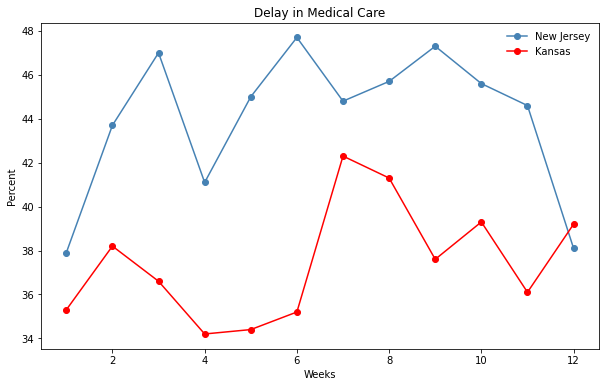

In [98]:
nj_delayed_care = nj_delayed_care_df["Percent"]
ks_delayed_care = ks_delayed_care_df["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_expected_plot, = plt.plot(Week, nj_delayed_care, marker = "o", color = "steelblue", label = "New Jersey")
ks_expected_plot, = plt.plot(Week, ks_delayed_care, marker = "o", color = "red", label = "Kansas")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Delay in Medical Care")

plt.legend(loc='best', frameon=False)
plt.savefig("medicalcaredelay.png")
plt.show()

### Housing insecurity

##### Percentage of adults who are not current on rent or mortgage payments, or who have slight or no confidence that their household can pay next month’s rent or mortgage on time

The HPS includes three items to help understand housing security and the expectations of being able to
pay rent or mortgage. In cooperation with the Department of Housing and Urban Development, these
items include the tenure item used by most surveys, whether the prior month’s rent or mortgage was
paid on time, and the respondents expectations of their ability to pay next month’s rent or mortgage on
time. 

In [99]:
housing_insecurity_df.drop(housing_insecurity_df.loc[housing_insecurity_df["Area"]== "United States"].index, inplace=True)
nj_housing_insecurity = housing_insecurity_df.loc[housing_insecurity_df["Area"] == "New Jersey"]
ks_housing_insecurity = housing_insecurity_df.loc[housing_insecurity_df["Area"] == "Kansas"]

In [100]:
nj_housing_insecurity

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
35,1,New Jersey,6776822,1233751,163034,26.3,3.2
32,2,New Jersey,6776822,1451550,309633,31.8,5.9
29,3,New Jersey,6776822,1451913,192337,32.2,4.0
26,4,New Jersey,6776822,1359414,163770,29.3,3.4
23,5,New Jersey,6776822,1272511,161778,28.4,3.1
20,6,New Jersey,6776822,1057641,236996,24.4,4.9
17,7,New Jersey,6776822,1125115,240909,23.8,4.9
14,8,New Jersey,6776822,1392612,181194,30.1,3.8
11,9,New Jersey,6776822,1321467,209905,28.7,4.1
8,10,New Jersey,6776822,1370672,194206,28.5,3.9


In [101]:
ks_housing_insecurity

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
34,1,Kansas,2140957,320961,63807,22.7,4.0
31,2,Kansas,2140957,296524,85659,22.0,5.9
28,3,Kansas,2140957,302189,67011,24.5,5.2
25,4,Kansas,2140957,292976,57378,20.3,3.9
22,5,Kansas,2140957,228109,45043,16.3,3.2
19,6,Kansas,2140957,232106,43588,16.3,2.8
16,7,Kansas,2140957,202676,65245,15.4,4.7
13,8,Kansas,2140957,194589,37409,13.5,2.7
10,9,Kansas,2140957,311049,58811,22.7,4.1
7,10,Kansas,2140957,246146,56023,16.5,3.8


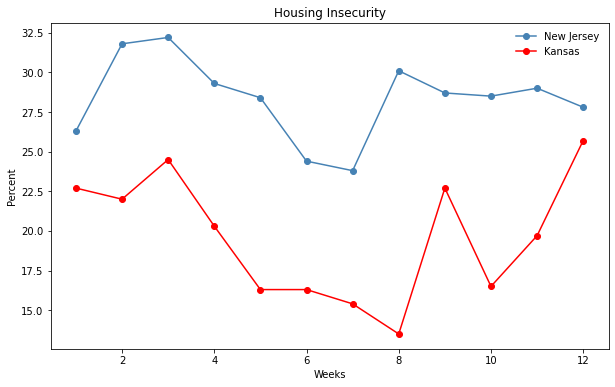

In [102]:
nj_housing = nj_housing_insecurity["Percent"]
ks_housing = ks_housing_insecurity["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_housing_plot, = plt.plot(Week, nj_housing, marker = "o", color = "steelblue", label = "New Jersey")
ks_housing_plot, = plt.plot(Week, ks_housing, marker = "o", color = "red", label = "Kansas")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Housing Insecurity")

plt.legend(loc='best', frameon=False)
plt.savefig("housing.png")
plt.show()

### Food Scarcity

##### Percentage of adults in households where there was either sometimes or often not enough to eat in the last 7 day

Losses in employment income, along with disruptions in other parts of the economy, have led to
significant efforts to provide food in many communities. The HPS measures food sufficiency and
security, asking food sufficiency for the period prior to March 13th, 2020 in addition to the last seven
days. For households that do not get enough needed or wanted food, the HPS asks why. The HPS asks
about the receipt of free food, the source of the free food, the amount of money spend on food to be
prepared at home, the amount spent on food prepared by outside vendors, and finally the confidence
about being able to afford food over the next four weeks. The Census Bureau worked with USDA’s
Economic Research Service to develop these questions to align with those collected on other surveys
and address food insecurity during the COVID-19 pandemic. 

In [103]:
food_scarcity_df.drop(food_scarcity_df.loc[food_scarcity_df["Area"]== "United States"].index, inplace=True)
nj_food_scarcity = food_scarcity_df.loc[food_scarcity_df["Area"] == "New Jersey"]
ks_food_scarcity = food_scarcity_df.loc[food_scarcity_df["Area"] == "Kansas"]

In [104]:
nj_food_scarcity

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
35,1,New Jersey,6776822,790923,155589,12.0,2.3
32,2,New Jersey,6776822,695764,261899,10.7,4.0
29,3,New Jersey,6776822,674542,144138,10.2,2.2
26,4,New Jersey,6776822,626036,151115,9.6,2.3
23,5,New Jersey,6776822,666152,135809,10.2,2.0
20,6,New Jersey,6776822,719199,188590,11.0,2.9
17,7,New Jersey,6776822,435282,135340,6.5,2.0
14,8,New Jersey,6776822,667190,140617,10.1,2.1
11,9,New Jersey,6776822,713752,181304,10.8,2.8
8,10,New Jersey,6776822,555901,128676,8.4,2.0


In [105]:
ks_food_scarcity

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
34,1,Kansas,2140957,143851,35154,6.8,1.7
31,2,Kansas,2140957,155335,45121,7.5,2.1
28,3,Kansas,2140957,142684,31076,6.8,1.5
25,4,Kansas,2140957,164541,37779,7.8,1.8
22,5,Kansas,2140957,151068,33394,7.2,1.6
19,6,Kansas,2140957,208832,52173,10.0,2.5
16,7,Kansas,2140957,199014,48329,9.4,2.3
13,8,Kansas,2140957,163793,45554,7.8,2.2
10,9,Kansas,2140957,172191,54842,8.3,2.6
7,10,Kansas,2140957,146446,33179,7.0,1.6


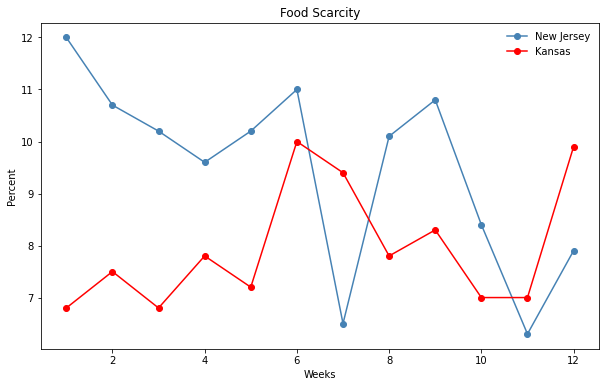

In [106]:
nj_food = nj_food_scarcity["Percent"]
ks_food = ks_food_scarcity["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_housing_plot, = plt.plot(Week, nj_food, marker = "o", color = "steelblue", label = "New Jersey")
ks_housing_plot, = plt.plot(Week, ks_food, marker = "o", color = "red", label = "Kansas")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Food Scarcity")

plt.legend(loc='best', frameon=False)
plt.savefig("Food Scarcity.png")
plt.show()

### School Changes 

The COVID-19 pandemic has led to stay-home orders in most areas for at least some time since March
13th. As a result, many people have children who were not able to attend school in-person and many
school systems turned to alternate methods of continuing course work. Together with the National
Center for Education Statistics, the Census Bureau included questions that ask how education changed
for these households, identifying households with children enrolled in school, and whether classes were
cancelled, shifted to distance learning, or changed in some other way. As a result of school systems
being moved to distance learning formats, another concern raised has been children’s access to
computers and the internet. The HPS asks about the access that children have to both, and how they
were paid for. Finally, the education section includes two items to that ask about the time students
spend in contact with their teachers and, separately, working on school activities within the household. 

In [107]:
school_changes_df.drop(school_changes_df.loc[school_changes_df["Area"]== "United States"].index, inplace=True)
nj_school_changes = school_changes_df.loc[school_changes_df["Area"] == "New Jersey"]
ks_school_changes = school_changes_df.loc[school_changes_df["Area"] == "Kansas"]

In [108]:
nj_school_changes

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
35,1,New Jersey,6776822,2004125,195656,100.0,0.0
32,2,New Jersey,6776822,1863014,302747,100.0,0.0
29,3,New Jersey,6776822,1620711,212663,100.0,0.0
26,4,New Jersey,6776822,1521487,169069,100.0,0.0
23,5,New Jersey,6776822,1550134,164830,100.0,0.0
20,6,New Jersey,6776822,1312064,155772,100.0,0.0
17,7,New Jersey,6776822,1676937,200271,99.8,0.2
14,8,New Jersey,6776822,1779188,221501,99.8,0.4
11,9,New Jersey,6776822,1796515,182526,99.8,0.4
8,10,New Jersey,6776822,1896266,192232,100.0,0.0


In [109]:
ks_school_changes

,Week,Area,Total Individual Population age 18+,Number,Margin of Error +/-,Percent,Percent Margin of Error +/-
34,1,Kansas,2140957,574495,69764,99.6,0.6
31,2,Kansas,2140957,630886,117878,99.9,0.3
28,3,Kansas,2140957,535305,72986,99.3,1.2
25,4,Kansas,2140957,555339,64869,99.9,0.1
22,5,Kansas,2140957,536676,55964,96.5,4.0
19,6,Kansas,2140957,502187,57692,98.4,1.3
16,7,Kansas,2140957,486834,71649,100.0,0.0
13,8,Kansas,2140957,535140,70799,99.9,0.1
10,9,Kansas,2140957,559753,73145,99.7,0.3
7,10,Kansas,2140957,548808,71514,99.9,0.2


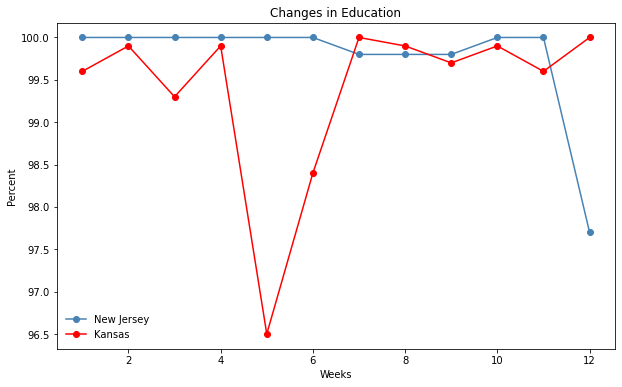

In [110]:
nj_ed = nj_school_changes["Percent"]
ks_ed = ks_school_changes["Percent"]
Week = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12]
plt.figure(figsize = (10, 6))
nj_ed_plot, = plt.plot(Week, nj_ed, marker = "o", color = "steelblue", label = "New Jersey")
ks_ed_plot, = plt.plot(Week, ks_ed, marker = "o", color = "red", label = "Kansas")
plt.xlabel("Weeks")
plt.ylabel("Percent")
plt.title("Changes in Education")

plt.legend(loc='best', frameon=False)
plt.savefig("Education Changes.png")

plt.show()